In [130]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point, MultiPoint
import networkx as nx
import geonetworkx as gnx
import google_conf
import numpy as np

In [43]:
plt.style.use('seaborn-white')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_31002/1576836852.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [44]:
pleiades_regions = gpd.read_file("../data/pleiades_regions.geojson", driver="GeoJSON")
pleiades_regions_merged = pleiades_regions.unary_union

In [57]:
provinces = gpd.read_file("../data/roman_province_boundaries.json")
provinces = provinces.to_crs("EPSG:4326")
len(provinces)

61

In [81]:
origo_geo = gpd.read_parquet("../data/origo_geo.parquet")
origo_geo = origo_geo.set_geometry("edh_point")
origo_geo.crs = "EPSG:4326"

In [82]:
origo_geo = gpd.sjoin(origo_geo, provinces, how="left")
origo_geo.rename(columns={"province" : "province_dest", "index_right" : "dest_index"}, inplace=True)

In [83]:
origo_geo = origo_geo.set_geometry("origo_point")
origo_geo.crs = "EPSG:4326"
origo_geo = gpd.sjoin(origo_geo, provinces, how="left")
origo_geo.rename(columns={"province" : "province_source", "index_right" : "source_index"}, inplace=True)

In [84]:
origo_geo

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,Certainty,...,1BCE,1CE,2CE,3CE,4CE,5CE,dest_index,province_dest,source_index,province_source
0,HD075902/1,HD075902,cives(!) (= civis) Nervius+,() (= ) Nervius,109199.0,None,50.777494,4.084768,Nervii,certain,...,False,False,True,True,False,False,28.0,Germania Inferior,24.0,Belgica
1,HD081444/1,HD081444,natione(?)Pannonius,()Pannonius,992076.0,None,47.500000,12.500000,Pannoniae,uncertain (name could be interpreted differently),...,False,False,True,True,False,False,20.0,Britannia,42.0,Noricum
2,HD056833/3,HD056833,cives(= civis) Convena*,(= ) Convena,246357.0,None,42.966682,0.269919,Convenae,certain,...,False,False,True,False,False,False,41.0,Hispania Citerior,26.0,Aquitania
3,HD018231/1,HD018231,cives(= civis) Veliocassinius,(= ) Veliocassinius,109412.0,None,49.364001,0.831097,Veliocasses,certain,...,False,False,True,True,False,False,28.0,Germania Inferior,27.0,Lugdunensis
4,HD010286/1,HD010286,natione+* [---] Aelia [---],[---] Aelia [---],197389.0,None,45.560018,18.675749,Mursa,uncertain (name could be interpreted differently),...,False,False,True,False,False,False,60.0,Roma,43.0,Pannonia Inferior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,HD037345/1,HD037345,natione Zoela!,Zoela,236724.0,None,41.717349,-6.628006,Zoelae,certain,...,False,True,False,False,False,False,43.0,Pannonia Inferior,41.0,Hispania Citerior
2589,HD056506/2,HD056506,Ἐφέσιος,Ἐφέσιος,599612.0,None,37.940762,27.340307,Ephesus/Arsinoe(ia),certain,...,True,False,False,False,False,False,0.0,Achaia,19.0,Asia
2607,HD025474/5,HD025474,Μιλήσιος,Μιλήσιος,599799.0,None,37.522905,27.278317,Miletus,certain,...,False,False,True,False,False,False,46.0,Aegyptus,19.0,Asia
2637,HD008584/6,HD008584,natione verna,None,167964.0,None,45.776152,5.281057,Vernas,wild guess,...,True,False,False,False,False,False,60.0,Roma,25.0,Narbonensis


In [75]:
centroid_series = provinces.centroid

/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_31002/1802002792.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_series = provinces.centroid


In [90]:
pronvinces_edges_weighted = origo_geo.groupby(["source_index", "dest_index"], as_index=False).size()
pronvinces_edges_weighted.rename(columns={"size" : "weight"}, inplace=True)
pronvinces_edges_weighted

,source_index,dest_index,weight
0,0.0,0.0,1
1,0.0,6.0,2
2,0.0,20.0,4
3,0.0,23.0,1
4,0.0,24.0,1
...,...,...,...
586,60.0,56.0,3
587,60.0,57.0,1
588,60.0,58.0,3
589,60.0,59.0,1


In [94]:
origo_geo[(origo_geo["source_index"]==0) & (origo_geo["dest_index"]==20)]

,id,hd_nr,origo,origo_clean,pleiades_id,pleiades_title_list,pleiades_Latitude,pleiades_Longitude,pleiades_title,Certainty,...,1BCE,1CE,2CE,3CE,4CE,5CE,dest_index,province_dest,source_index,province_source
343,HD001389/1,HD001389,natus* Athenis*,Athenis,579885.0,None,37.972454,23.726268,Athenae,uncertain (another good variant exists),...,False,True,False,False,False,False,20.0,Britannia,0.0,Achaia
1078,HD069555/1,HD069555,natione Grecus,Grecus,1001896.0,None,37.500000,22.500000,Hellas,uncertain (name could be interpreted differently),...,False,False,True,True,False,False,20.0,Britannia,0.0,Achaia
1079,HD070191/1,HD070191,civis Grecus,Grecus,1001896.0,None,37.500000,22.500000,Hellas,uncertain (name could be interpreted differently),...,False,False,False,False,True,False,20.0,Britannia,0.0,Achaia
1415,HD069852/1,HD069852,domo Melitenis,Melitenis,582863.0,None,37.979531,23.718407,Melite,uncertain (another good variant exists),...,False,False,False,True,False,False,20.0,Britannia,0.0,Achaia


In [148]:
origo_geo.to_parquet("../data/origo_geo_provinces.parquet")

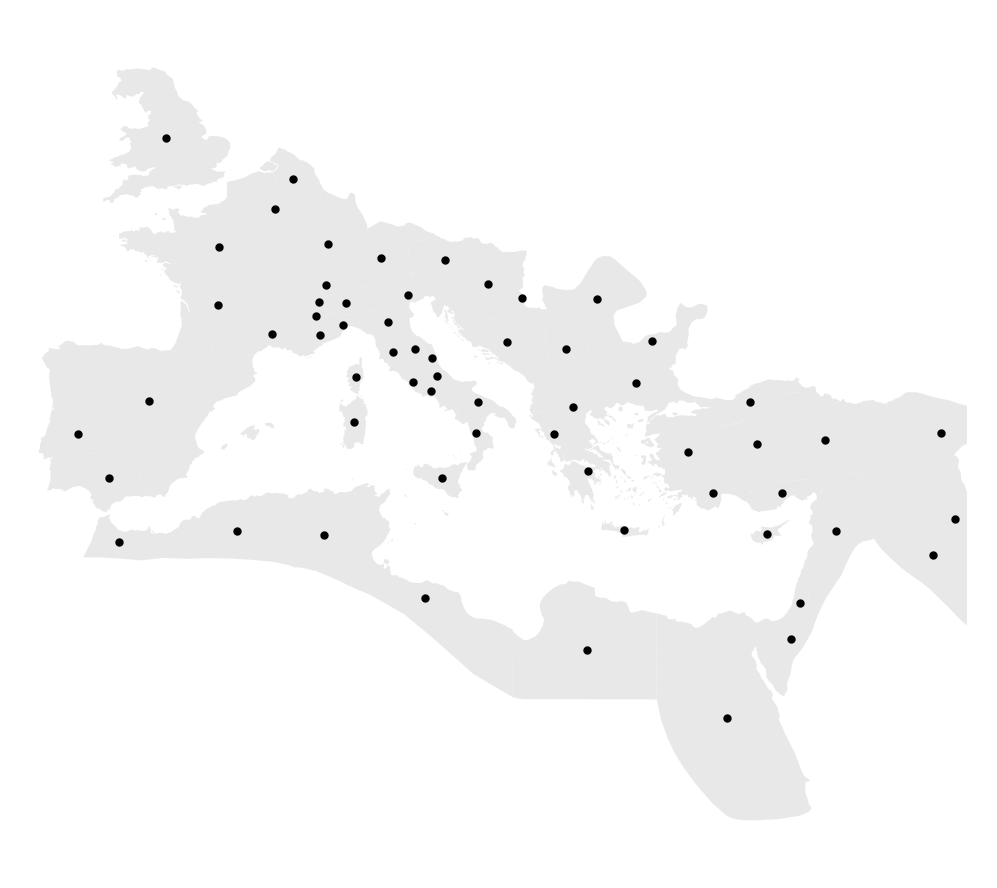

In [76]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
provinces.plot(color="lightgray", ax=ax, alpha=0.5)
centroid_series.plot(markersize=1, color="black", ax=ax)
ax.set_xlim(-10, 45)
ax.set_axis_off()

In [113]:
G = gnx.GeoDiGraph()

In [114]:
G.add_nodes_from_gdf(provinces)

In [115]:
G.nodes(data=True)

NodeDataView({0: {'geometry': <shapely.geometry.multipolygon.MultiPolygon object at 0x29ac4c190>, 'province': 'Achaia'}, 1: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29a77cdf0>, 'province': 'Alpes Poeninae'}, 2: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29a74fe20>, 'province': 'Alpes Graiae'}, 3: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac3fa00>, 'province': 'Umbria (Regio VI)'}, 4: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac4c490>, 'province': 'Picenum (Regio V)'}, 5: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac4c2e0>, 'province': 'Samnium (Regio IV)'}, 6: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac4c4f0>, 'province': 'Latium et Campania (Regio I)'}, 7: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac4c070>, 'province': 'Etruria (Regio VII)'}, 8: {'geometry': <shapely.geometry.polygon.Polygon object at 0x29ac4c5b0>, 'province': 'Transpadana (Regio XI)'}, 9: {

In [149]:
pronvinces_edges_weighted

,source_index,dest_index,weight
0,0.0,0.0,1
1,0.0,6.0,2
2,0.0,20.0,4
3,0.0,23.0,1
4,0.0,24.0,1
...,...,...,...
586,60.0,56.0,3
587,60.0,57.0,1
588,60.0,58.0,3
589,60.0,59.0,1


In [150]:
pronvinces_edges_weighted.to_csv("../data/pronvinces_edges_weighted.csv")

In [116]:
pronvinces_edges_weighted_tuples = [tuple(el) for el in pronvinces_edges_weighted.values.tolist()]
pronvinces_edges_weighted_tuples[:10]

[(0.0, 0.0, 1.0),
 (0.0, 6.0, 2.0),
 (0.0, 20.0, 4.0),
 (0.0, 23.0, 1.0),
 (0.0, 24.0, 1.0),
 (0.0, 28.0, 1.0),
 (0.0, 29.0, 1.0),
 (0.0, 30.0, 4.0),
 (0.0, 39.0, 1.0),
 (0.0, 41.0, 2.0)]

In [121]:
G.add_weighted_edges_from(pronvinces_edges_weighted_tuples)
G.remove_edges_from(nx.selfloop_edges(G))

In [122]:
G.edges(data=True)

OutEdgeDataView([(0, 6.0, {'weight': 2.0}), (0, 20.0, {'weight': 4.0}), (0, 23.0, {'weight': 1.0}), (0, 24.0, {'weight': 1.0}), (0, 28.0, {'weight': 1.0}), (0, 29.0, {'weight': 1.0}), (0, 30.0, {'weight': 4.0}), (0, 39.0, {'weight': 1.0}), (0, 41.0, {'weight': 2.0}), (0, 43.0, {'weight': 1.0}), (0, 56.0, {'weight': 1.0}), (0, 58.0, {'weight': 1.0}), (0, 59.0, {'weight': 1.0}), (0, 60.0, {'weight': 2.0}), (1, 23.0, {'weight': 1.0}), (1, 58.0, {'weight': 1.0}), (1, 59.0, {'weight': 1.0}), (3, 6.0, {'weight': 3.0}), (3, 7.0, {'weight': 1.0}), (3, 23.0, {'weight': 4.0}), (3, 28.0, {'weight': 3.0}), (3, 44.0, {'weight': 2.0}), (3, 56.0, {'weight': 1.0}), (3, 58.0, {'weight': 2.0}), (3, 59.0, {'weight': 2.0}), (3, 60.0, {'weight': 3.0}), (4, 3.0, {'weight': 1.0}), (4, 6.0, {'weight': 2.0}), (4, 20.0, {'weight': 2.0}), (4, 23.0, {'weight': 2.0}), (4, 28.0, {'weight': 3.0}), (4, 42.0, {'weight': 1.0}), (4, 44.0, {'weight': 2.0}), (4, 56.0, {'weight': 1.0}), (4, 58.0, {'weight': 2.0}), (4, 60.0

In [ ]:
indegrees = nx.in_degree_centrality(G)

In [123]:
centroid_series_pos = centroid_series.apply(lambda point: (point.x, point.y))

In [124]:
pos_dict = dict(zip(range(len(centroid_series_pos)), centroid_series_pos.tolist()))
pos_dict

{0: (22.746225971707617, 37.88324141018042),
 1: (7.350252801970795, 46.280822758228645),
 2: (6.936089574726544, 45.52158927673218),
 3: (12.575403426403991, 43.36422703611117),
 4: (13.595846804034123, 42.99114524700101),
 5: (13.890619981519587, 42.15847499734596),
 6: (13.559398412074893, 41.50852910978399),
 7: (11.302169060731936, 43.231435112935976),
 8: (8.542530064337342, 45.4675630504128),
 9: (8.35342120266437, 44.47637396205509),
 10: (11.00089303901565, 44.60337861661467),
 11: (6.8053557567748975, 44.87287797752985),
 12: (7.031725786173242, 44.00683044406708),
 13: (12.160602407503891, 45.83353827599476),
 14: (16.15187714641787, 39.61578519885989),
 15: (14.177160478040006, 37.57898845358525),
 16: (9.031052009998616, 40.08214467226826),
 17: (9.103900564176078, 42.140579725532845),
 18: (16.301758360464074, 41.003826005318835),
 19: (28.584493012615635, 38.76384474470005),
 20: (-2.021297121698538, 52.90310551804363),
 21: (24.857080449996666, 35.229967347312915),
 22:

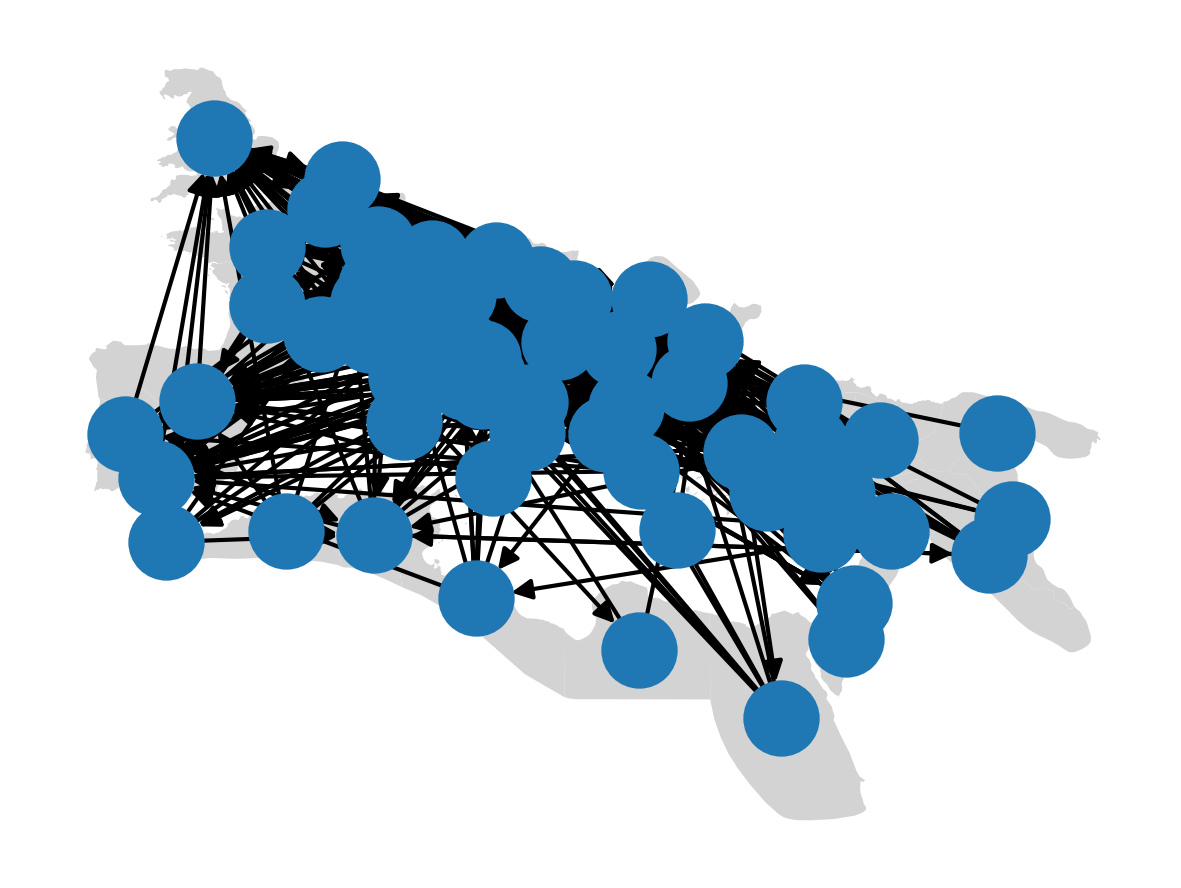

In [125]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
provinces.plot(color="lightgray", ax=ax)
nx.draw(G, pos=pos_dict)

In [129]:
indegrees = nx.in_degree_centrality(G)
node_sizes = list(indegrees.values())

In [145]:
def plot_network(G, edge_width_attr="weight", margins = 0.2, pos=pos_dict, legend_dict=None,ax=None):
    node_colors = ["black" for node in G.nodes()]
    indegrees = nx.in_degree_centrality(G)
    node_sizes = [val *50 for val in  list(indegrees.values())]
    edge_sizes = [np.log2(w*1) for w in nx.get_edge_attributes(G, edge_width_attr).values()]
    if ax == None:
        fig, ax = plt.subplots()
    ax.set_axis_off()
    layer_edges = nx.draw_networkx_edges(G,
                                         pos=pos,
                                         alpha=0.4,
                                         width= edge_sizes,
                                         style="solid",
                                         edge_color="darkblue",
                                         connectionstyle="arc3,rad=0.2",
                                         ax=ax)
    layer_nodes = nx.draw_networkx_nodes(G,
                                         pos=pos,
                                         node_size=node_sizes,
                                         node_color=node_colors,
                                         ax=ax)
    #layer_labels = nx.draw_networkx_labels(H,
    #                                       pos=pos,
    #                                       font_size=8,
    #                                       ax=ax)
    #if legend_dict != None:
    #    markers = [plt.Line2D([0,0],[0,0], marker="o", color=color, lw=0) for color in legend_dict.values()]
    #    ax.legend(markers, legend_dict.keys(), bbox_to_anchor=(0, 0), loc='upper left', frameon=False)
    layers = [layer_edges, layer_nodes] #, layer_labels]
    return

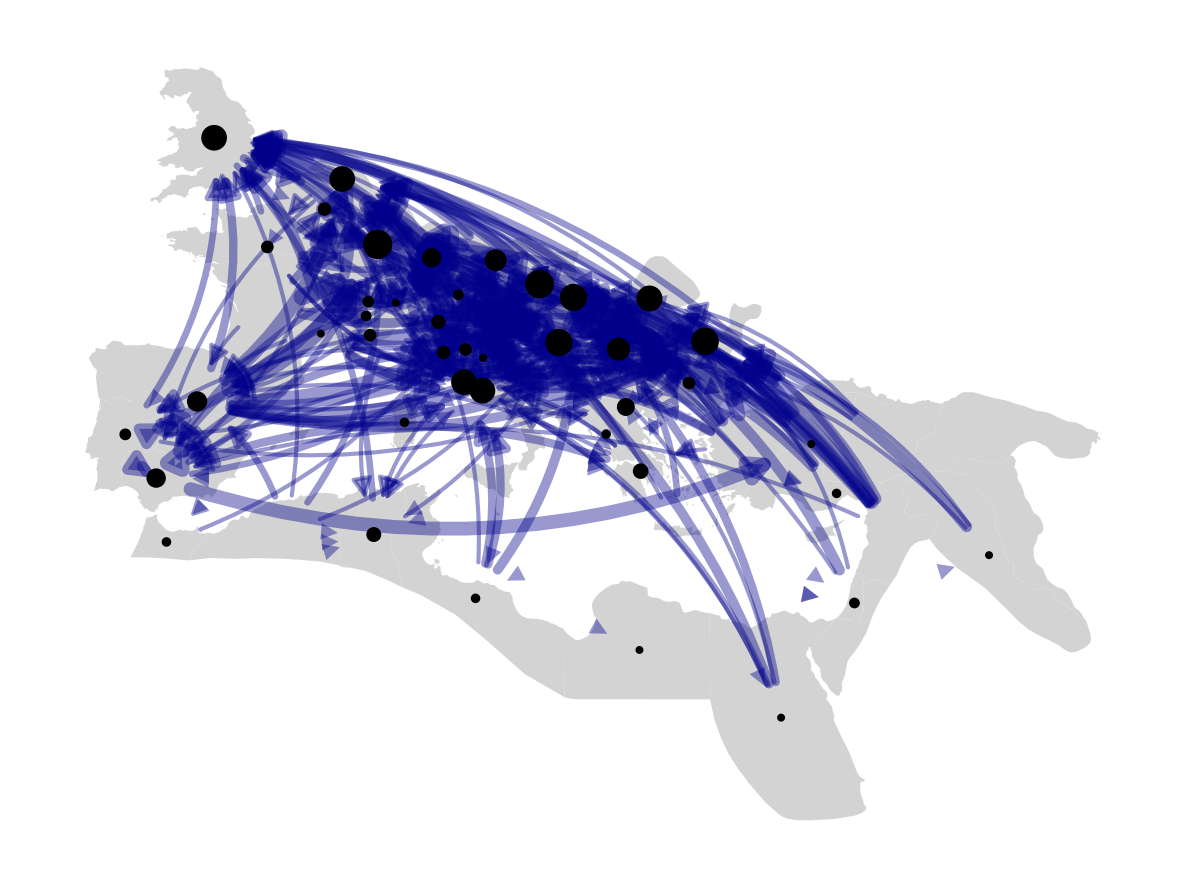

In [147]:
fig, ax = plt.subplots(figsize=(5.2, 3), dpi=300, tight_layout=True)
provinces.plot(color="lightgray", ax=ax)
plot_network(G, edge_width_attr="weight", margins = 0.2, pos=pos_dict, ax=ax)